<a href="https://www.kaggle.com/code/aktaruzzaman21/ride-sharing-customer-churn-prediction-using-ml?scriptVersionId=290707627" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Project Description

Customer churn is a major challenge for ride-sharing platforms. This project builds machine learning and neural network models to predict whether a customer will stop using a ride-sharing service based on historical usage and demographic features.

Objective:
Predict customer churn using ride-sharing customer data.

Models Used:

Logistic Regression

Random Forest Classifier

Artificial Neural Network (ANN)

# Import Required Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

2026-01-08 08:27:26.454775: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1767860846.648263      47 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1767860846.704715      47 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


AttributeError: 'MessageFactory' object has no attribute 'GetPrototype'

AttributeError: 'MessageFactory' object has no attribute 'GetPrototype'

AttributeError: 'MessageFactory' object has no attribute 'GetPrototype'

AttributeError: 'MessageFactory' object has no attribute 'GetPrototype'

AttributeError: 'MessageFactory' object has no attribute 'GetPrototype'

# Load Dataset

Use a ride-sharing churn dataset containing customer usage information.

Example features:

Typical columns:

signup_date

last_trip_date

trips_in_first_30_days

avg_dist

avg_rating_by_driver

avg_rating_of_driver

surge_pct

weekday_pct

city

phone

churn

In [2]:
df = pd.read_csv("/kaggle/input/ride-sharing/churnnotclean.csv")
df.head()

,Unnamed: 0,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,city,last_trip_date,phone,signup_date,surge_pct,trips_in_first_30_days,luxury_car_user,weekday_pct,churn
0,0,3.67,5.0,4.7,1.10,King's Landing,2014-06-17,iPhone,2014-01-25,15.4,4,True,46.2,0
1,1,8.26,5.0,5.0,1.00,Astapor,2014-05-05,Android,2014-01-29,0.0,0,False,50.0,1
2,2,0.77,5.0,4.3,1.00,Astapor,2014-07-01,iPhone,2014-06-01,0.0,3,False,100.0,0
3,3,2.36,4.9,4.6,1.14,King's Landing,2014-06-29,iPhone,2014-10-01,20.0,9,True,80.0,0
4,4,3.13,4.9,4.4,1.19,Winterfell,2014-03-15,Android,2014-01-27,11.8,14,False,82.4,1


# Exploratory Data Analysis

In [3]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Unnamed: 0              50000 non-null  int64  
 1   avg_dist                50000 non-null  float64
 2   avg_rating_by_driver    49799 non-null  float64
 3   avg_rating_of_driver    41878 non-null  float64
 4   avg_surge               50000 non-null  float64
 5   city                    50000 non-null  object 
 6   last_trip_date          50000 non-null  object 
 7   phone                   49604 non-null  object 
 8   signup_date             50000 non-null  object 
 9   surge_pct               50000 non-null  float64
 10  trips_in_first_30_days  50000 non-null  int64  
 11  luxury_car_user         50000 non-null  bool   
 12  weekday_pct             50000 non-null  float64
 13  churn                   50000 non-null  int64  
dtypes: bool(1), float64(6), int64(3), obje

,Unnamed: 0,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,surge_pct,trips_in_first_30_days,weekday_pct,churn
count,50000.000000,50000.000000,49799.000000,41878.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,24999.500000,5.796827,4.778158,4.601559,1.074764,8.849536,2.278200,60.926084,0.535380
std,14433.901067,5.707357,0.446652,0.617338,0.222336,19.958811,3.792684,37.081503,0.498752
min,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,12499.750000,2.420000,4.700000,4.300000,1.000000,0.000000,0.000000,33.300000,0.000000
50%,24999.500000,3.880000,5.000000,4.900000,1.000000,0.000000,1.000000,66.700000,1.000000
75%,37499.250000,6.940000,5.000000,5.000000,1.050000,8.600000,3.000000,100.000000,1.000000
max,49999.000000,160.960000,5.000000,5.000000,8.000000,100.000000,125.000000,100.000000,1.000000


Date Handling

In [4]:

df["signup_date"] = pd.to_datetime(df["signup_date"])
df["last_trip_date"] = pd.to_datetime(df["last_trip_date"])


df["days_since_signup"] = (df["last_trip_date"] - df["signup_date"]).dt.days

df["days_since_signup"].fillna(df["days_since_signup"].median(), inplace=True)

df.drop(["signup_date", "last_trip_date"], axis=1, inplace=True)


/tmp/ipykernel_47/2280123368.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["days_since_signup"].fillna(df["days_since_signup"].median(), inplace=True)


Check missing values:

In [5]:
df.isnull().sum()

Unnamed: 0                   0
avg_dist                     0
avg_rating_by_driver       201
avg_rating_of_driver      8122
avg_surge                    0
city                         0
phone                      396
surge_pct                    0
trips_in_first_30_days       0
luxury_car_user              0
weekday_pct                  0
churn                        0
days_since_signup            0
dtype: int64

# Data Cleaning

Fill missing values:

In [6]:
df["avg_rating_by_driver"].fillna(df["avg_rating_by_driver"].mean(), inplace=True)
df["avg_rating_of_driver"].fillna(df["avg_rating_of_driver"].mean(), inplace=True)

/tmp/ipykernel_47/3098204009.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["avg_rating_by_driver"].fillna(df["avg_rating_by_driver"].mean(), inplace=True)
/tmp/ipykernel_47/3098204009.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].meth

# Encoding Categorical Variables

In [7]:
label_cols = ["city", "phone"]

for col in label_cols:
    df[col] = LabelEncoder().fit_transform(df[col])


# Feature Selection

In [8]:
X = df.drop("churn", axis=1)
y = df["churn"]

# Train-Test Split

In [9]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.25,
    random_state=42,
    stratify=y
)


# Feature Scaling

In [10]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Logistic Regression Model

In [11]:
lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train, y_train)

y_pred_lr = lr_model.predict(X_test)

print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_lr))
print(classification_report(y_test, y_pred_lr))


Logistic Regression Accuracy: 0.762
              precision    recall  f1-score   support

           0       0.75      0.73      0.74      5808
           1       0.77      0.79      0.78      6692

    accuracy                           0.76     12500
   macro avg       0.76      0.76      0.76     12500
weighted avg       0.76      0.76      0.76     12500



Confusion Matrix:

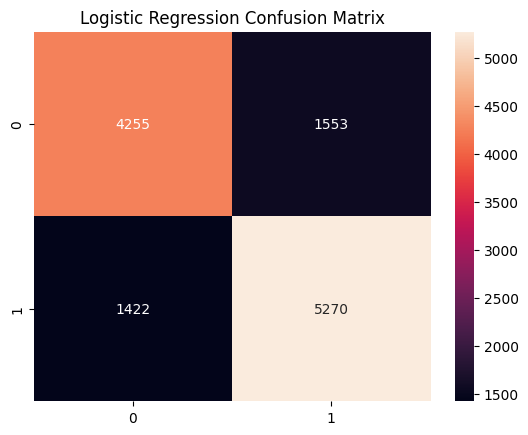

In [12]:
sns.heatmap(confusion_matrix(y_test, y_pred_lr), annot=True, fmt="d")
plt.title("Logistic Regression Confusion Matrix")
plt.show()

# Random Forest Classifier

In [13]:
rf_model = RandomForestClassifier(
    n_estimators=100,
    random_state=42,
    class_weight="balanced"
)

rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))


Random Forest Accuracy: 0.85584
              precision    recall  f1-score   support

           0       0.90      0.77      0.83      5808
           1       0.82      0.93      0.87      6692

    accuracy                           0.86     12500
   macro avg       0.86      0.85      0.85     12500
weighted avg       0.86      0.86      0.85     12500



Confusion Matrix:

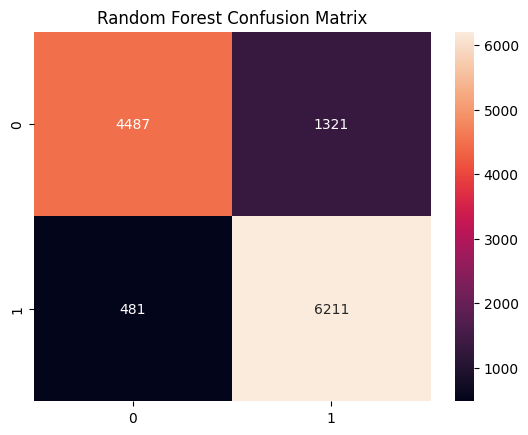

In [14]:
sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot=True, fmt="d")
plt.title("Random Forest Confusion Matrix")
plt.show()

# Artificial Neural Network (ANN)

In [15]:
ann_model = Sequential()

ann_model.add(Dense(64, activation="relu", input_dim=X_train.shape[1]))
ann_model.add(Dropout(0.3))
ann_model.add(Dense(32, activation="relu"))
ann_model.add(Dense(1, activation="sigmoid"))

ann_model.compile(
    optimizer="adam",
    loss="binary_crossentropy",
    metrics=["accuracy"]
)

history = ann_model.fit(
    X_train,
    y_train,
    epochs=50,
    batch_size=32,
    validation_split=0.2,
    verbose=1
)


Epoch 1/50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
2026-01-08 08:28:45.877879: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.7045 - loss: 0.5614 - val_accuracy: 0.8048 - val_loss: 0.4167
Epoch 2/50
938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7998 - loss: 0.4349 - val_accuracy: 0.8216 - val_loss: 0.3888
Epoch 3/50
938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8138 - loss: 0.4114 - val_accuracy: 0.8249 - val_loss: 0.3809
Epoch 4/50
938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8243 - loss: 0.3928 - val_accuracy: 0.8307 - val_loss: 0.3777
Epoch 5/50
938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8291 - loss: 0.3832 - val_accuracy: 0.8343 - val_loss: 0.3718
Epoch 6/50
938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8282 - loss: 0.3862 - val_accuracy: 0.8351 - val_loss: 0.3679
Epoch 7/50
938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8383 - loss: 0.3744 - val_accuracy: 0.8340 - val_loss: 0.3701
Epoch 8/50
938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8360 - loss: 0.3753 - val_accuracy: 0.8367 - val_

Prediction and evaluation:

In [16]:
y_pred_ann = (ann_model.predict(X_test) > 0.5).astype(int)

print("ANN Accuracy:", accuracy_score(y_test, y_pred_ann))
print(classification_report(y_test, y_pred_ann))


391/391 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
ANN Accuracy: 0.8496
              precision    recall  f1-score   support

           0       0.91      0.75      0.82      5808
           1       0.81      0.93      0.87      6692

    accuracy                           0.85     12500
   macro avg       0.86      0.84      0.85     12500
weighted avg       0.86      0.85      0.85     12500



# Model Performance Comparison

In [17]:
results = pd.DataFrame({
    "Model": ["Logistic Regression", "Random Forest", "ANN"],
    "Accuracy": [
        accuracy_score(y_test, y_pred_lr),
        accuracy_score(y_test, y_pred_rf),
        accuracy_score(y_test, y_pred_ann)
    ]
})

results


,Model,Accuracy
0,Logistic Regression,0.76200
1,Random Forest,0.85584
2,ANN,0.84960
